# Elliptic Curves

(sec-ec)=
## Definition of an Elliptic Curve

[Elliptic Curves](https://en.wikipedia.org/wiki/Elliptic_curve) are very important objects in number theory and, as we shall soon see, have applications in cryptography and digital signatures.

:::{prf:definition} Elliptic Curve
:label: def-ec

A curve given by a *Weierstrass equation* of the form
```{math}
:label: eq-basic-weq

y^2 = x^3 + ax + b,  \quad \text{for some $a$ and $b$ with $\Delta = -16 \cdot (4a^3 + 27b^2) \neq 0$}
```
is called an *elliptic curve*.  The quantity $\Delta = -16 \cdot (4a^3 + 27b^2)$ is the *discriminant* of the curve.
:::


:::{note}

We should observe that not all elliptic curves can be given by an equation of the form of [](#eq-basic-weq).  But this definition is adequate for our modest goals in this book.
:::

When we think about curves, like lines, parabolas, circles, etc., we usually think of them in the *Cartesian plane* $\mathbb{R}^2$.  This means that the curve is seen as the set of points $(x, y)$, where $x$ and $y$ are real numbers that satisfy the equation of the curve.


:::{caution}

Elliptic curves are not [ellipses](https://en.wikipedia.org/wiki/Ellipse)!  The name comes from the fact that an equation similar to [](#eq-basic-weq) appears when we try to compute the *length* of an ellipse.
:::

As an example, we can take the elliptic curve given by $y^2 = x^3 + 1$.  In Sage we can easily create this elliptic curve and graph it:

In [1]:
E1 = EllipticCurve([0, 1])  # a = 0, b = 1, so y^2 = x^3 + 1
E1

Elliptic Curve defined by y^2 = x^3 + 1 over Rational Field

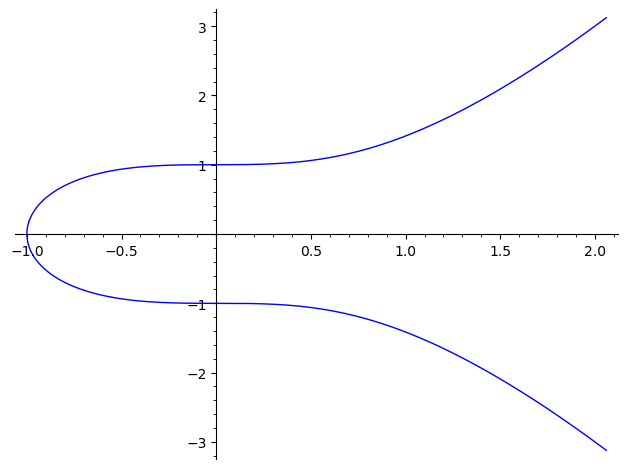

In [2]:
plot(E1)

We can also get the discriminant:

In [3]:
E1.discriminant()

-432

The requirement that $\Delta \neq 0$ is so that the curve is [smooth](https://en.wikipedia.org/wiki/Curve#Differential_geometry).  This means we avoid problems like a *node* (a *self-intersection*), like what happens to $y^2 = x^3 - 3x + 2$:

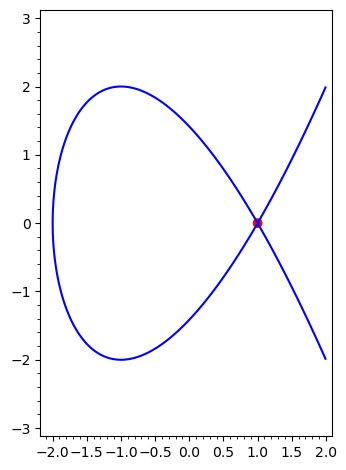

In [4]:
y = var("y")
implicit_plot(y^2 == x^3  - 3 * x + 2, (-2.1, 2), (-3, 3)) + point([1, 0], color="red", size=50)

And to avoid a *cusp* (a sharp edge), like what happens to $y^2 = x^3$:

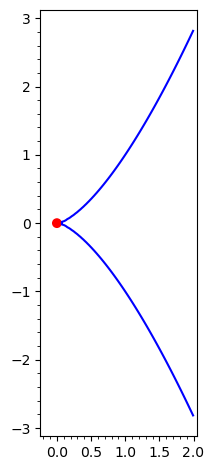

In [5]:
implicit_plot(y^2 == x^3, (-0.2, 2), (-3, 3)) + point([0, 0], color="red", size=50)

Note that elliptic curves might have two disjoint components (in $\mathbb{R}^2$), for instance $y^2 = x^3 - x$:

In [6]:
E2 = EllipticCurve([-1, 0])
E2

Elliptic Curve defined by y^2 = x^3 - x over Rational Field

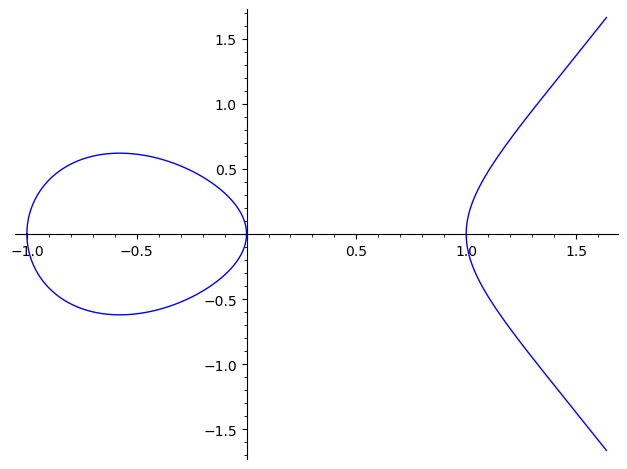

In [7]:
plot(E2)

## Adding Points

### General Rule

An important feature of elliptic curves that make them very "useful" is that we can *add points* on an elliptic curve.  More precisely, given two points $P$ and $Q$ on an elliptic curve $E$, we add these points using the following rule:

1) Draw a line through $P$ and $Q$.
2) This line will intersect the curve $E$ at a third point, say $R$.
3) Draw a *vertical line* through $R$.
4) This line will intercept the curve on a second point.  This point is our $P + Q$.

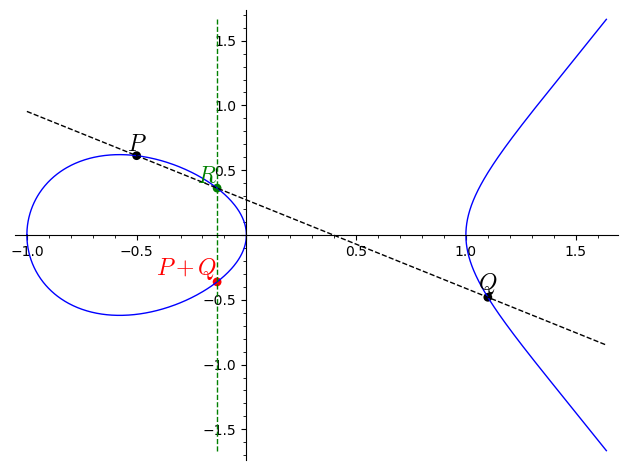

In [8]:
# static

x1 = -0.5  # x-coord of P
sign1 = 1  # sign of y-coord of P

x2 = 1.1  # x-coord of Q
sign2 = -1  # sign of y-coord of Q

# points (get y-coord)
P = E2.base_extend(RR).lift_x(RR(x1), all=True)[0]
Q = E2.base_extend(RR).lift_x(RR(x2), all=True)[0]

# adjust y-coord signs
if sign1 * P[1] < 0:
    P = -P
if sign2 * Q[1] < 0:
    Q = -Q

# get affine coordinates
P = P.xy()
Q = Q.xy()

# get R, the third intersection point
m = (Q[1] - P[1]) / (Q[0] - P[0])
c = P[1] - m * P[0]
x3 = m ^ 2 - P[0] - Q[0]
y3 = m * x3 + c
R = (x3, m * x3 + c)

# sum P + Q
S = (x3, -y3)

# boundaries for the plot
# numerical values from plot(E2).get_axes_range()
xmin = min(-1,0, P[0], Q[0], R[0])
xmax = max(1.64, P[0], Q[0], R[0])
ymin = min(-1.67, P[1], Q[1], R[1], S[1])
ymax = max(1.67, P[1], Q[1], R[1], S[1])

# start plotting
p = plot(E2, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)  # elliptic curve

# add P and Q and their labels
p += point(P, color="black", size=40)
p += text("$P$", P, vertical_alignment="bottom", color="black", fontsize=17)

p += point(Q, color="black", size=40)
p += text("$Q$", Q, vertical_alignment="bottom", color="black", fontsize=17)

# line through P and Q
p += plot(
    m * x + c,
    (x, xmin, xmax),
    color="black",
    linestyle="dashed",
)

# Add R and its label
p += point(R, color="green", size=40)
p += text(
    "$R$",
    R,
    vertical_alignment="bottom",
    horizontal_alignment="right",
    color="green",
    fontsize=17,
)

# vertical line through  R
p += line(
    [(x3, ymin), (x3, ymax)], color="green", linestyle="dashed"
)

# add P + Q and its label
p += text(
    "$P + Q$",
    S,
    vertical_alignment="bottom",
    horizontal_alignment="right",
    color="red",
    fontsize=17,
)
p += point(S, color="red", size=40)

p.show(xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)

A few questions are raised from this process, though:

1) Do we know if the point $R$ (the third point on the curve on the line through $P$ and $Q$) exist?  If does, is it unique?  (If not, which point do we pick.)
2) Do we know if the vertical line through $R$ will intersect the curve at a second (and different) point? Are there more points on the intersection?
3) How do we add a point to itself, i.e., how do we compute $P + P$?  (This is a problem since $P$ does not determine a line by itself.)


### Adding $P + Q$, with $P \neq Q$ (and $x_1 \neq x_2$)

Let's answer the first two questions under the assumption that $P \neq Q$.  Suppose that $P = (x_1, y_1)$ and $Q = (x_2, y_2)$ are on the same vertical line, i.e., $x_1 = x_2$, but $y_1 \neq y_2$. Since the equation of the curve is $y^2 = x^3 + ax + b$, we have that $y_1$ and $y_2$ are the *only* solutions of $y^2 = x_1^3 + ax_1 + b$, since the solutions are $y = \pm \sqrt{x_1^3 + a x_1 + b}$.  In particular, we have that $y_2 = - y_1$.  Then, the line passing through $P$ and $Q$ does *not* have a third point of intersection!

But assuming that $P \neq Q$ and they are not on the same vertical line, i.e., $x_1 \neq x_2$, let's try to find the third point.  The line through $P$ and $Q$ is given by
```{math}
y = \left(\frac{y_2-y_1}{x_2-x_1}\right)(x - x_1) + y_1 = \left(\frac{y_2-y_1}{x_2-x_1}\right) x + \left(y_1 - \left(\frac{y_2-y_1}{x_2-x_1}\right) x_1 \right).
```
Letting
```{math}
m = \frac{y_2 - y_1}{x_2 - x_1}, \qquad c = y_1 - m x_1,
```
this line becomes $y=mx + c$.  So, we want to find the common solutions of
```{math}
\begin{align*}
y^2 &= x^3 + ax + b && \text{(the elliptic curve)},\\
y&= mx + c && \text{(the line)}.
\end{align*}
```
Substituting the value of $y$ of the second equation in the first, we get
```{math}
(mx+c)^2 = x^3 + ax + b \qquad \Longrightarrow \qquad x^3 - m^2x^2 + (a -2mc)x + (b-c^2) = 0.
```

We now need to find the solutions of this cubic equation.  Fortunately, we already know the $x_1$ and $x_2$ are solutions, since $P$ and $Q$ are in the line and curve.

Hence if $x_3$ is the other (still unknown) solution, we have that
```{math}
\begin{align*}
x^3 - m^2x^2 + (a -2mc)x + (b-c^2)
&= (x - x_1)(x - x_2)(x - x_3) \\
&= x^3 -(x_1 + x_2 + x_3)x^2 + (x_1x_2 + x_1x_3 + x_2x_3)x - x_1x_2x_3.
\end{align*}
```

This means that
```{math}
-m^2 = -(x_1 + x_2 + x_3) \quad \Longrightarrow \quad x_3 = m^2 - x_1 - x_2.
```
And that is the *only* other solution.  To obtain the $y$-coordinate of $R$, we just need to plug $x_3$ in the equation of the line, so $y_3 = mx_3 + c$.

Now, to find $P + Q$ we just need to flip the sign of $y_3$, so the coordinates of $P + Q$ are  $(x_3, -y_3)$.

In summary:

:::{prf:algorithm} $P + Q$, with $x_1 \neq x_2$
:label: al-sum-notvert


Let $P = (x_1, y_1)$ and $Q = (x_2, y_2)$ be points in the elliptic curve given by $y^2 = x^3 + ax + b$, with $x_1 \neq x_2$.  Then, let
```{math}
\begin{align*}
m &= \frac{y_2 - y_1}{x_2 - x_1},\\
c &= y_1 - m x_1, \\
x_3 &= m^2 - x_1 - x_2,\\
y_3 &= mx_3 + c.
\end{align*}
```
Then $P + Q = (x_3, {\color{red} -}y_3)$.
:::

Note that we still have a problem if $P \neq Q$ but $x_1 = x_2$. The solution for this case is more involved and we will come back to it later.

### Adding $P + P$ (with $y_1 \neq 0$)

Now, let's focus on what we do when $P=Q$, i.e., when we want to add $P + P$.  We follow a similar idea as in calculus: we think of the line through $P$ and itself, as the [tangent line](https://en.wikipedia.org/wiki/Tangent) to the curve at the point $P$:

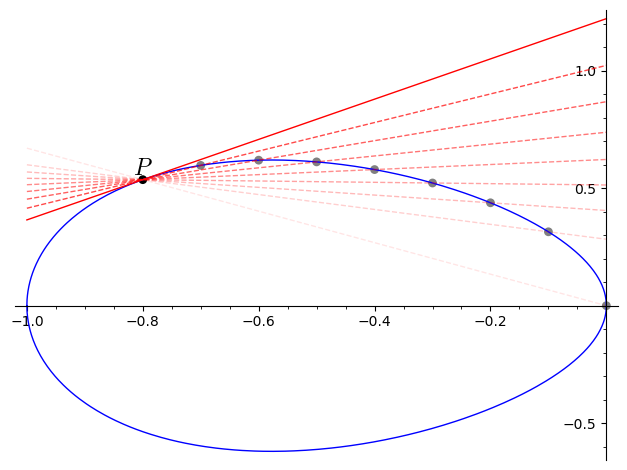

In [9]:
# point P between 0 and -1
x1 = -0.8
sign1 = 1  # sign of y-coord of P
# points (get y-coord)
P = E2.base_extend(RR).lift_x(RR(x1), all=True)[0]
# adjust y-coord signs
if sign1 * P[1] < 0:
    P = -P
P = P.xy()

# initial Q
x2 = 0

# number of secant lines
steps = 8

delta = (x2 - x1) / steps

# curve and P
p = plot(E2, xmin=-1, xmax=0)
p += point(P, color="black", size=40)
p += text("$P$", P, vertical_alignment="bottom", color="black", fontsize=17)

for i in range(1, steps + 1):
    # new Q
    x2 = x1 + i * delta
    Q = E2.base_extend(RR).lift_x(RR(x2), all=True)[0]
    if Q[1] < 0:
        Q = -Q
    Q = Q.xy()

    p += point(Q, color="gray", size=40)

    # line through P and Q
    m = (Q[1] - P[1]) / (Q[0] - P[0])
    c = P[1] - m * P[0]

    p += plot(
        m * x + c,
        (x, -1, 0),
        color="red",
        linestyle="dashed",
        alpha=0.8 - i * 0.7/steps  # opacity
    )

# tangent line
m = (3*P[0]^2 - 1)/(2 * P[1])
p += plot(m * (x - P[0]) + P[1], (x, -1, 0), color="red")

show(p)

The [tangent line](https://en.wikipedia.org/wiki/Tangent) to $P$, represented in solid red above, is the [limit](https://en.wikipedia.org/wiki/Limit_(mathematics)) of the secant lines through $P$ and a second distinct point (the dashed lines above), when this second point gets closer and closer to $P$.

So, given a point $P$ on the curve, we need to find the tangent line to the curve at that point.  We need calculus for that, and the best method would be [implicit differentiation](https://en.wikipedia.org/wiki/Implicit_function#Implicit_differentiation): taking derivatives of $y^2 = x^3 + ax + b$ we get
```{math}
2yy' = 3x^2 + a \qquad \Longrightarrow \qquad y' = \frac{3x^2 + a}{2y}.
```


So, if $P$ is such that $y_1 \neq 0$, we have that the slope of the tangent line is given by
```{math}
m = \frac{3x_1^2 + a}{2y_1},
```
and if we take $c = y_1 - mx_1$, then the tangent line at $P$ is $y = mx + c$.

:::{note}

If $y_1 = 0$, then the tangent line at $P$ is *vertical*!  It will then not intersect the curve in any other point.
:::

Now, we need to find the other point of intersection when $y_1 \neq 0$.  We can use the same approach as in the previous case, noting that $x_1$ is a [double root](https://en.wikipedia.org/wiki/Multiplicity_(mathematics)#Multiplicity_of_a_root_of_a_polynomial) of the corresponding equation.  If $x_3$ is the other (still unknown) solution, we have that
```{math}
\begin{align*}
x^3 - m^2x^2 + (a -2mc)x + (b-c^2)
&= (x - x_1)(x - x_1)(x - x_3) \\
&= x^3 -(2x_1 + x_3)x^2 + (x_1^2 + 2x_1x_3)x - x_1^2x_3.
\end{align*}
```

This means that
```{math}
-m_2^2 = -(2x_1 + x_3) \quad \Longrightarrow \quad x_3 = m^2 - 2x_1.
```
And that is the *only* other solution.  To obtain the $y$-coordinate of $R$, again we just need to plug $x_3$ in the equation of the line, so $y_3 = mx_3 + c$.

Now, to find $P + P$ we just need to flip the sign of $y_3$, so the coordinates of $P + Q$ are  $(x_3, -y_3)$.

In summary:

:::{prf:algorithm} $P + P$, with $y_1 \neq 0$
:label: al-sum-vertnottwo


Let $P = (x_1, y_1)$ be a point in the elliptic curve given by $y^2 = x^3 + ax + b$, with $y_1 \neq 0$.  Then, let
```{math}
\begin{align*}
m &= \frac{3x_1^2 + a}{2y_1} ,\\
c &= y_1 - m x_1, \\
x_3 &= m^2 - 2x_1,\\
y_3 &= mx_3 + c.
\end{align*}
```
Then $P + Q = (x_3, {\color{red} -}y_3)$.
:::


:::{note}
Note that {prf:ref}`al-sum-vertnottwo` is the same as {prf:ref}`al-sum-notvert` with $x_2 = x_1$, *except* for the formula of $m$, which is different.
:::

### The Point at Infinity

We still have two problems: the case when $P \neq Q$, but $x_1 = x_2$ and the case $P = Q$, and $y_1 = 0$.  Both problems come from the fact that the corresponding lines, the line through $P$ and $Q$ in the first case, and the tangent line through $P$ in the second, are *vertical* and thus do not intersect the curve in any other points.

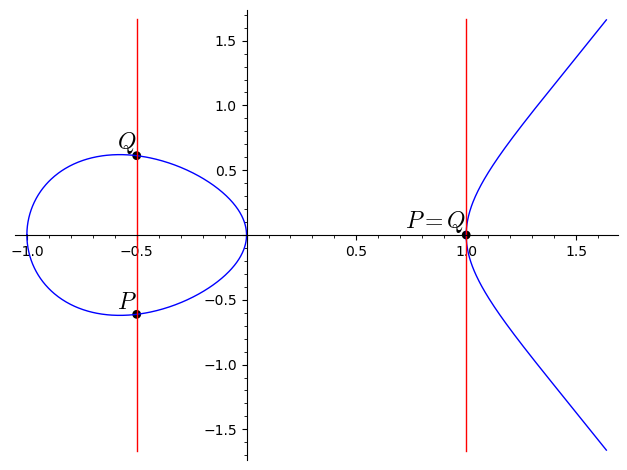

In [10]:
P  = E2((1, 0))

p = plot(E2)
p += point(P.xy(), color="black", size=40)
p += line([(1, -1.67), (1, 1.67)], color="red")
p += text("$P = Q$", P.xy(), vertical_alignment="bottom", horizontal_alignment="right", color="black", fontsize=17)

Q = E2.lift_x(-0.5)
p += point(Q.xy(), color="black", size=40)
p += text("$P$", Q.xy(), vertical_alignment="bottom", horizontal_alignment="right", color="black", fontsize=17)
p += point((-Q).xy(), color="black", size=40)
p += text("$Q$", (-Q).xy(), vertical_alignment="bottom", horizontal_alignment="right", color="black", fontsize=17)
p += line([(-0.5, -1.67), (-0.5, 1.67)], color="red")

show(p)

The problem is that our curve is *missing a point*!

In technical terms, an elliptic curves is a [projective curve](https://en.wikipedia.org/wiki/Projective_geometry).  In the [projective plane](https://en.wikipedia.org/wiki/Projective_plane) we have an extra line "at infinity".  The points on this extra line correspond to *directions* (or slopes) of lines in the plane. This means that *all lines with the same slope pass through the same point of the line at infinity*.  (The common phrase that "parallel lines meet at infinity" comes from this notion of projective geometry.)

Our elliptic curves *always* have one extra point at this line at infinity: the point corresponding to *vertical lines*!  This point is usually denoted by $\mathcal{O}$.  This point has another important property: the tangent line to the curve at $\mathcal{O}$ is the *line at infinity*, and so contains no extra point on the curve besides $\mathcal{O}$ itself.

Note that, in particular, the line through $P$ and $\mathcal{O}$ (if $P \neq \mathcal{O}$) is the vertical line passing through $P$.

:::{note}

As we have it here, note that $\mathcal{O}$ has no coordinates!  One can give it *projective coordinates*, but we will avoid it here, and just treat this point according to its properties.
:::


So, in summary:
1) Every elliptic curve has an extra point $\mathcal{O}$ "at infinity".
2) Every vertical line on the plane passes through $\mathcal{O}$.
3) The tangent line at $\mathcal{O}$ does not pass through any other point of the elliptic curve.
4) The line through $P \neq \mathcal{O}$ and $\mathcal{O}$ is the *vertical* line through $P$.

### Adding $P + Q$ (Remaining Cases)

With this extra point, we can rephrase how we add points on elliptic curves:

1) Draw a line through $P$ and $Q$.  If $P=Q$, draw the tangent line at $P$.
2) This line will intersect the curve $E$ at a third point, say $R$.
3) Draw a through $R$ and $\mathcal{O}$.  If $R = \mathcal{O}$, draw the tangent line at $\mathcal{O}$.
4) This line will intercept the curve on a second point.  This point is our $P + Q$.


So, let's investigate how the two problematic cases from before work.

If $P \neq Q$, with neither equal to $\mathcal{O}$, and $x_1 = x_2$, then the line through $P$ and $Q$ is vertical. Therefore, the third point on that line is $\mathcal{O}$.  Next, we then need the tangent line at $\mathcal{O}$, which gives the third point to be $\mathcal{O}$ itself, as it is the only point in that line (the line at infinity).  Hence, in this case, we have that $P + Q = \mathcal{O}$.

If $P=Q$ and $y_1=0$, then the tangent line at $P$ is vertical, so the third point of intersection is $\mathcal{O}$.  As in the previous case, this means that $P + P = \mathcal{O}$.

But, since we introduced a new point, also have some new cases to consider.  What do we get if add $P + \mathcal{O}$?  Here, we also have two cases: $P \neq \mathcal{O}$ and $P = \mathcal{O}$.  In the first case, that the line through $P$ and $\mathcal{O}$ is a vertical line.  Then the third point on that line $R$ is on the same vertical line as $P$.  When we join $R$ and $\mathcal{O}$ we get exactly the same vertical line, and the other point on it is the original $P$.  Hence, we have that $P + \mathcal{O} = P$.

When adding $\mathcal{O} + \mathcal{O}$, we draw the tangent line at $\mathcal{O}$ and the third point $R$ is $\mathcal{O}$ itself.  Then, we take the tangent line at $\mathcal{O}$ *again*, and the third point is again $\mathcal{O}$.  Therefore, we have that $\mathcal{O} + \mathcal{O} = \mathcal{O}$.

So, we have that $P + \mathcal{O} = P$, whether or not $P = \mathcal{O}$, and hence $\mathcal{O}$ is like zero: adding it to *any* other point just results in the other point.

### The Full Algorithm

We can now give the complete algorithm for addition of points on an elliptic curve:

:::{prf:algorithm} Addition on Elliptic Curve
:label: al-sum


Let $P$ and $Q$ be points on an elliptic curve with equation $y^2 = x^3 + ax + b$.  Then:
1) If $P = \mathcal{O}$, then $P + Q = Q$.
2) If $Q = \mathcal{O}$, then $P + Q = P$.
3) If $P = (x_1, y_1) \neq Q = (x_2, y_2)$:
   1) if $x_1=x_2$ (and so $y_1 \neq y_2$), then $P + Q = \mathcal{O}$;
   2) if $y_1 \neq y_2$, then we use {prf:ref}`al-sum-notvert`.
4) If $P = Q = (x_1, y_1)$:
   1) if $y_1 = 0$, then $P + Q = \mathcal{O}$;
   2) if $y_1 \neq 0$, then we use {prf:ref}`al-sum-vertnottwo`.
:::


:::{admonition} Homework
:class: note

You will implement this algorithm in your [homework](#sec-hw10).
:::

### Notation

We shall use the usual notation for addition.  So, we may write $2P$ for $P + P$, $3P$ for $P + P + P$, and so on.  Also, since $\mathcal{O}$ is like zero, if $P + Q = \mathcal{O}$, we say that $Q = -P$ (and $P = -Q$).
Note that, from the above, we have that
```{math}
- \mathcal{O} = \mathcal{O} \qquad \text{and} \qquad - (x_1, y_1) = (x_1, -y_1).
```

## Base Field

So far we have been seen elliptic curves *over the real numbers*. meaning that the coefficients $a$ and $b$ are real numbers and our points have coordinates that are also real numbers.  But, some times we might want to use other [fields](https://en.wikipedia.org/wiki/Field_(mathematics)).  For instance, we might want to use complex numbers (denoted by $\mathbb{C}$), rational numbers (i.e. quotients of integers, denoted by $\mathbb{Q}$), or finite fields, such as $\mathbb{F}_p$ for some prime $p$.

Again, this means that the coefficients $a$ and $b$ will be taken from this field and the points will have coordinates with same field.  In this case, if the field is $F$, we say that the elliptic curve is *defined over $F$*.

In terms of notation, if we want to define an elliptic curve over a field $F$ (and so $a$ and $b$ are elements of this field $F$) and give it the name $E$, we write:
```{math}
E / F :\; y^2 = x^3 + ax + b.
```
(The "$E$" is the name we've given it, and the "$F$" says that $E$ is defined *over $F$*, i.e., $a, b \in F$, and we will look a points with coordinates in $F$.)

Finally, for an elliptic curve $E$ defined over $F$, we write $E(F)$ for the set of points of $E$ with coordinates in $F$.  This is convenient, as sometimes we might consider points on a larger or smaller field.  For instance, we can have
```{math}
E /\mathbb{R} : y^2 = x^3 - 1,
```
and it makes sense to ask for $E(\mathbb{Q})$ or $E(\mathbb{C})$ (besides the natural $E(\mathbb{R})$).

:::{important}

The point at infinity $\mathcal{O}$ is in $E(F)$ for *any* field $F$.
:::

As a simple example, if
```{math}
E / \mathbb{F}_3 : \; y^2 = x^3 + 2x + 1
```
then we can find $E(\mathbb{F}_3)$: we simply try all nine points in $(x, y)$, with $x, y \in \mathbb{F}_3$, and see which ones satisfy the equation.

In [11]:
F3 = Zmod(3)
res = []
for x, y in zip(F3, F3):
    if y^2 == x^3 + 2*x + 1:
        res.append((x, y))
res

[(1, 1), (2, 2)]

So, $E(\mathbb{F}_3) = \{ (1, 1), (2, 2), \mathcal{O} \}$.

## Elliptic Curves in Sage


Of course, Sage can deal with elliptic curves, as you could see in the code used for examples above.  To create the elliptic curve we simply give the corresponding coefficients $a$ and $b$.  For instance, let's create the curve
```{math}
E / \mathbb{F}_{11}: \; y^2 = x^3 + 7x + 2
```

In [12]:
E = EllipticCurve([Mod(7, 11), Mod(2, 11)])
E

Elliptic Curve defined by y^2 = x^3 + 7*x + 2 over Ring of integers modulo 11

In [13]:
E.random_point()

(10 : 7 : 1)

One can verify that $(8, 3)$ and $(10, 4)$ are a points on this curve:

In [14]:
x1, y1 = Mod(8, 11), Mod(3, 11)
x2, y2 = Mod(10, 11), Mod(4, 11)
a, b = Mod(7, 11), Mod(2, 11)

y1^2 == x1^3 + a * x1 + b, y2^2 == x2^3 + a * x2 + b

(True, True)

We could also check it as:

In [15]:
(x1, y1) in E, (x2, y2) in E

(True, True)

We have that $(1, 1)$ is not on $E$:

In [16]:
(Mod(1, 11), Mod(1, 11)) in E

False

But we can actually make the previous pairs satisfying the equation of the curve actual *points* on the curve:

In [17]:
P = E((x1, y1))
Q = E(x2, y2)
P, Q

((8 : 3 : 1), (10 : 4 : 1))

:::{note}

Sage will always give points on elliptic curves in the form $(a:b:c)$.  (These are *projective coordinates*.)  Most of the times it will be $(a:b:1)$, and in this case it corresponds to the point $(a,b)$.  So, in the case above, we have that $P+Q = (1,0)$.

I've never seen Sage give a point $(a:b:c)$, where $c \neq 0, 1$, but if you do, then it corresponds to the point $\left( \dfrac{a}{c}, \dfrac{b}{c} \right)$.
:::

If you want to see the typical coordinates (called *affine coordinates*), we use the method `.xy`:

In [18]:
P.xy(), Q.xy()

((8, 3), (10, 4))

If you try to make a point that is not on the curve, you get an error.  For instance, trying

```python
E((Mod(1, 11), Mod(1, 11)))
```

gives

```
TypeError: Coordinates [1, 1, 1] do not define a point on Elliptic Curve defined by y^2 = x^3 + 7*x + 2 over Ring of integers modulo 11
```

But now that our points are on $E$, we can add, subtract, etc.

In [19]:
(P + Q).xy()  # adding P and Q

(7, 3)

In [20]:
(-Q).xy()  # negative of Q

(10, 7)

In [21]:
(3 * P - 4 * Q).xy()

(10, 4)

To get $\mathcal{O}$, we simply do `E(0)`:

In [22]:
O = E(0)
O

(0 : 1 : 0)

Note that the way that $\mathcal{O}$ is *always* represented in Sage is `(0 : 1 : 0)`.  It is the only case where you will have the last number equal to $0$ (instead of the usual $1$).

Since $\mathcal{O}$ has no (affine) coordinates, the method `xy` gives an error.  If you try:

```python
O.xy()
```

you get an error:

```
ZeroDivisionError: inverse of Mod(0, 11) does not exist
```

But, of course, $\mathcal{O}$ works as zero:

In [23]:
O + P == P

True

In [24]:
O + Q == Q

True

Since $\mathbb{F}_{11}$ is finite, the set of points $E(\mathbb{F}_{11})$ is also finite, and Sage can give us the whole set:

In [25]:
E.points()

[(0 : 1 : 0),
 (7 : 3 : 1),
 (7 : 8 : 1),
 (8 : 3 : 1),
 (8 : 8 : 1),
 (10 : 4 : 1),
 (10 : 7 : 1)]

Note that we can also recover the coefficients $a$ and $b$ from $E$ itself with the methods `.a4()` and `a6()`:

In [26]:
E.a4() == a, E.a6() == b

(True, True)

## Elliptic Curve as an Abelian Group

One can verify then, that the points on elliptic curve $E$ have the following properties with respect to the addition:

1) **Commutativity:** If $P, Q \in E$, then $P + Q = Q + P$.
2) **Associativity:** If $P, Q, R \in E$, then $(P + Q) + R = P + (Q + R)$.
3) **Neutral Element:** There is an element $\mathcal{O} \in E$ such that for any $P \in E$ we have $P + \mathcal{O} = \mathcal{O} + P = P$.
4) **Inverse Element:** For any element $P \in E$, there is some element $-P \in E$ such that $E + (-E) = (-E) + E = \mathcal{O}$.

:::{note}

Note the difference in the associativity.  For $(P + Q) + R$, we first add $P + Q$ and then add $R$ to the result of the addition.  For $P + (Q + R)$ we add to $P$ the result of the addition of $Q + R$.  Since both give the same result, then we can simply write $P + Q + R$ (with no parentheses) and let the reader decide on the order they want to add them.

We are very used to doing this, but not every operation is associative.  For instance, *subtraction* is not.  Note the difference between $(1 - 2) - 3$ and $1 - (2 - 3)$:
```{math}
\begin{align*}
(1 - 2) - 3 &= -1 - 3 = -4, \\
1 - (2 - 3) &= 1 - (-1) = 2.
\end{align*}
```
:::

It's very easy to check Commutativity, Neutral Element, and Inverse Element properties, but checking the Associativity property, takes *a lot* of work, since there are many cases to be checked.

Note that if $p$ is prime, then $\mathbb{F}_p^{\times}$ has similar properties with respect to the *product*:

1) **Commutativity:** If $a, b \in \mathbb{F}_p^{\times}$, then $a \cdot b = b \cdot a$.
2) **Associativity:** If $a, b, c \in \mathbb{F}_p^{\times}$, then $(a \cdot b) \cdot c = a \cdot (b \cdot c)$.
3) **Neutral Element:** There is an element $1 \in \mathbb{F}_p^{\times}$ such that for any $a \in \mathbb{F}_p^{\times}$ we have $a \cdot 1 = 1 \cdot a = a$.
4) **Inverse Element:** For any element $a \in \mathbb{F}_p^{\times}$, there is some element $a^{-1} \in \mathbb{F}_p^{\times}$ such that $a \cdot a^{-1} = a^{-1} \cdot a = 1$.

Any set with an operation that satisfies the last three properties (Associativity, Neutral Element, and Inverse Element) is called a [group](https://en.wikipedia.org/wiki/Group_(mathematics)).  Groups that also satisfy the first property (Commutativity) are called an [Abelian groups](https://en.wikipedia.org/wiki/Abelian_group).

Hence, we say that an elliptic curve is an Abelian group with respect to its addition of points.


:::{note}

Note that with the [ElGamal Cryptosystem](#sec-elgamal) or [DSA](#sec-dsa), one can replace $\mathbb{F}_p^{\times}$ with any other *finite* Abelian group.  (Of course, extreme care is needed with the choice!)  This often has the benefit of making the [index calculus](#sec-index-calc) (the most efficient method of attack) unavailable.
:::

### Order of an Element

Remember that for some $a \in \mathbb{F}_p^{\times}$, the *order* of $a$, denoted by $|a|$, is the smallest positive exponent $k$ such that $a^k = 1$.  In other words, is the smallest number of times we *multiply* $a$ by itself to get the *neutral element* $1$.

We can generalize this for any group, with the care of replacing the multiplication by the corresponding operation.  In the case of an elliptic curve, the order of a point $P$, also denoted as $|P|$, is the smallest number of times we *add* $a$ to itself to get the *neutral element* $\mathcal{O}$.  In other words, is the smallest positive integer $k$ such that $k \cdot P = \mathcal{O}$.  (Note how taking a $k$-th power became multiplying by $k$ when the operation changed from multiplication to addition!)

For elliptic curves, this number does not always exits, in which case we say that $P$ has *infinite order*, and write $|P| = \infty$.  So, this means that we never get $\mathcal{O}$ by adding $P$ to itself.

For instance, in our previous example where:
```{math}
E / \mathbb{F}_{11}: \; y^2 = x^3 + 7x + 2
```
and  $P = (8, 3)$ and $Q = (10, 4)$, we have:

In [27]:
2 * P

(10 : 4 : 1)

In [28]:
3 * P

(7 : 3 : 1)

In [29]:
4 * P

(7 : 8 : 1)

In [30]:
5 * P

(10 : 7 : 1)

In [31]:
6 * P

(8 : 8 : 1)

In [32]:
7 * P

(0 : 1 : 0)

So, $|P| = 7$.  We can also ask Sage directly:

In [33]:
P.order()

7

Similarly for $Q$:

In [34]:
Q.order()

7

It is a know fact in group theory that if the group is finite (like any elliptic curve over a finite field), then every element has finite order.  In fact, every element has order dividing the number of elements of the group.  This is a consequence of [Lagrange's Theorem](https://en.wikipedia.org/wiki/Lagrange%27s_theorem_(group_theory)), which generalizes {prf:ref}`Euler's Theorem <th-euler>`, since $\mathbb{F}_p^{\times}$ is a group with $p-1$ elements.

But if the elliptic curve has infinitely many points, it might have points of infinite order.  Consider:
```{math}
E /\mathbb{Q} : \; y^2 = x^3 - 2x.
```

In [35]:
E = EllipticCurve([-2,0])
E

Elliptic Curve defined by y^2 = x^3 - 2*x over Rational Field

Then, $(-1, 1)$ is in $E$, so let $P = (-1, 1)$:

In [36]:
P = E((-1, 1))
P.xy()

(-1, 1)

This point has infinite order:

In [37]:
P.order()

+Infinity

## Elliptic Curves over $\mathbb{F}_p$

In our applications to cryptography and digital signature, we need large groups to replace $\mathbb{F}_p^{\times}$ for large primes $p$.  If we want to use elliptic curves, firstly we need the group to be finite, since we've seen that this is not always the case for elliptic curves.  But if the curve is over $\mathbb{F}_p$, for some prime $p$, then it certainly is finite, as we have at most $p^2$ pairs $(x, y)$ with $x, y \in \mathbb{F}_p$.

:::{important}

We should observe that {prf:ref}`def-ec` above does not work when $p=2$ or $p=3$. Since these primes are too small to give large groups, we will assume here that $p \geq 5$ and so we can assume that our elliptic curves are given by the Weierstrass equation given by equation [](#eq-basic-weq).
:::

:::{note}

Note that, although we do not have the geometry when working with elliptic curves over $\mathbb{F}_p$, the algebraic formulas we've deduced still properly define a sum (or group operation) on the curve.
:::

### Number of Points

So, given an elliptic curve $E / \mathbb{F}_p$, how many points do we have in $E(\mathbb{F}_p)$, i.e., what is $|E(\mathbb{F}_p)|$?  (Remember that if $S$ is a set, then $|S|$ is the number of elements of $S$.)

Of course, since there are $p^2$ pairs $(x, y)$ with $x, y \in \mathbb{F}_p$, then we have $|E(\mathbb{F}_p)|  \leq p^2 + 1$, accounting for all possible pairs, plus the extra point $\mathcal{O}$ at infinity.  But, of course, this bound is too large.

Before we improve it, remember the following proposition form our [study of squares in $\mathbb{F}_p$](#sec:sqrt_mod_p):

:::{prf:proposition}
:label: pr-squares_gen-2

If $g$ is a primitive root in $\mathbb{F}_p$ and $a \in \mathbb{F}_p^{\times}$, then $a$ is a square if and only if $a = g^k$ with $k$ *even*.  In particular, a random element in $\mathbb{F}_p^{\times}$ has a $50\%$ chance of being a square.
:::

So, if our elliptic curve is given by
```{math}
E / \mathbb{F}_p : \; y^2 = x^3 + ax + b
```
if we pick a random $x_0 \in \mathbb{F}_p$, then $x_0^3 + ax_0 + b$ has about $50\%$ chance of being a square, say $y_0$.  (Note that evaluating the expression $x^3 + ax + b$ at random elements, roughly also gives random elements.)  In that case, we get *two* points on the elliptic curve $(x_0, y_0)$ and $(x_0, -y_0)$.  (Note that since $p \neq 2$, these are indeed two distinct points!)  This leads us to the estimate that $|E(\mathbb{F}_p)|$ is *about* $p + 1$, as half of the $p$ values of $x$ in $\mathbb{F}_p$ give us two points, and we always have the extra point at infinity.

We don't expect, due to the randomness, that this value will be exact, but relatively close.  And indeed, this is true:

:::{prf:theorem} Hasse's Theorem
:label: th-hasse


Let $E / \mathbb{F}_p$ be an elliptic curve.  Then,
```{math}
|E(\mathbb{F}_p)| = p + 1 - t_p, \quad \text{where $|t_p| \leq 2 \sqrt{p}$}.
```
The *error term* $t_p$ is *the trace of the Frobenius*.
:::

Note that indeed $t_p$, the error of the $p+1$ estimate for the number of points, is relatively small when compared to $p+1$.  For instance, if $p$ is about $1{,}000{,}000$ then the error $t_p$ is at most $2{,}000$.

The proof of this theorem is beyond the scope of these notes, but we can try to verify it empirically:

In [38]:
number_of_tries = 20  # number of random elliptic curves to try

res = "|  p  | number of points | p + 1 |  t_p  | 2*sqrt(p) | |t_p| / 2*sqrt(p) |\n"
res += "|-----|------------------|-------|-------|-----------|-------------------|\n"

for _ in range(number_of_tries):
    p = random_prime(1000, lbound=5)
    Fp = FiniteField(p)  # base field

    # find a and b that work
    a = b = Fp(0)
    while 4 * a^3 + 27 * b^2 == 0:
        a = Fp.random_element()
        b = Fp.random_element()

    E = EllipticCurve([a, b])
    n = E.order()  # number of points
    tp = p + 1 - n  # trace of the Frobenius
    bound = numerical_approx(2 * sqrt(p))  # upper bound for t_p
    quot = abs(tp) / bound  # ratio between t_p and bound
    res += f"|{p:^5}|{n:^18}|{p + 1:^7}|{tp:^7}|{bound:^11.2f}|{quot:^19.2f}|\n"
print(res)

|  p  | number of points | p + 1 |  t_p  | 2*sqrt(p) | |t_p| / 2*sqrt(p) |
|-----|------------------|-------|-------|-----------|-------------------|
| 631 |       594        |  632  |  38   |   50.24   |       0.76        |
| 373 |       378        |  374  |  -4   |   38.63   |       0.10        |
| 653 |       644        |  654  |  10   |   51.11   |       0.20        |
| 227 |       253        |  228  |  -25  |   30.13   |       0.83        |
| 67  |        82        |  68   |  -14  |   16.37   |       0.86        |
| 613 |       616        |  614  |  -2   |   49.52   |       0.04        |
| 733 |       728        |  734  |   6   |   54.15   |       0.11        |
| 229 |       216        |  230  |  14   |   30.27   |       0.46        |
| 839 |       852        |  840  |  -12  |   57.93   |       0.21        |
|  7  |        7         |   8   |   1   |   5.29    |       0.19        |
| 263 |       266        |  264  |  -2   |   32.43   |       0.06        |
| 101 |        87        

## The  Elliptic Curve Discrete Log Problem

We will soon introduce a cryptosystem and a digital signature method based on ElGamal and the DSA, respectively, where we replace $\mathbb{F}_p^{\times}$ by $E(\mathbb{F}_p)$ for some elliptic curve $E/\mathbb{F}_p$.  The security of both methods, ElGamal and DSA, are based on the *Discrete Log Problem* (DLP): given $g$ and $h$ in $\mathbb{F}_p^{\times}$, how do we find $x$ such that $g^x = h$.  Here is the analogous problem for elliptic curves:

:::{prf:definition} Elliptic Curve Discrete Log Problem (ECDLP)
:label: def-ecdlp


Given and elliptic curve $E/\mathbb{F}_p$ and $P, Q \in E(\mathbb{F}_p)$, the *discrete log of $Q$ base $P$*, denoted by $\log_P(Q)$, is the integer $n$ such that $n \cdot P = Q$.  The *Elliptic Curve Discrete Log Problem (ECDLP)* asks how we can compute these logs efficiently.
:::

:::{important}

Note that, as with $\mathbb{F}_p^{\times}$, the discrete log might not exist!
:::


:::{note}

Since, by definition $|P| \cdot P = \mathcal{O}$, we may assume that the value of $\log_P(Q)$ is in $\mathbb{Z}/|P|\mathbb{Z}$.
:::

:::{caution}

Note since the operation on elliptic curves is *addition*, rather than multiplication, the properties of $\log_P$ are different from the usual log.  For instance, we have:
```{math}
\begin{align*}
\log_P(k \cdot Q) &= k \cdot \log_P(Q) && \text{(the analogue of $\log_b(x^k) = k \log_b(x)$)};\\
\log_P(Q_1 + Q_2) &= \log_P(Q_1) + \log_P(Q_2)  && \text{(the analogue of $\log_b(x_1 x_2) = \log_b(x_1) + \log_b(x_2)$)}.
\end{align*}
```

A better notation would have been $Q/P$, as if $Q = nP$, it would make sense to say $n = Q/P$.  But the $\log_P(Q)$ notation is the standard.
:::

So, our question now is *how hard is the ECDLP*, meaning, how hard is it to compute $\log_P(Q)$?

As with many problems of this sort, we cannot be quite sure, but so far this has been a difficult problem, as the addition of points on elliptic curves are somewhat complicated.  But as usual, we have no guarantee that someone may not come up with an ingenious idea that would allow us to easily compute these logs *tomorrow*!


But, so far, the best methods are collision methods, such as [Shank's Baby-Step/Giant-Step](#sec-bsgs) (which can be easily adapted for elliptic curves).  As observed before, a great advantage is that the [index calculus](#sec-index-calc) does not work with elliptic curves.  In practice, to solve the ECDLP for $E/\mathbb{F}_p$, the best known methods take about $\sqrt{p}$ steps, which makes it infeasible to solve it in practice for very large $p$.

As usual, there are specific cases in which the computations become simpler and should be avoided!  Among those are elliptic curves with $|E(\mathbb{F}_p)|$ equal to either $p$ or $p+1$ or curves over finite fields with $2^m$ with $m$ composite.  (Note we have not seen here finite fields with order $2^m$ and $m > 1$, since the only ones we've introduced here have a *prime* number of elements.)

## Fast Multiplication

In the previous methods of encryption and digital signatures, we needed to take large powers of elements in $\mathbb{F}_p^{\times}$.  Now, with elliptic curves, we need compute large *multiples* of a point, i.e., we need to replace products by sums.  But for these we can adapt [Fast Powers](#fast_powering): instead of using successive squaring, we use *successive doubling*.


:::{prf:algorithm} Fast Multiplying Algorithm (Successive Doubling)
:label: al-fast_mult

To compute $n \cdot P$, where $P$ is a point on an elliptic curve:

1) Write $n$ in base $2$, i.e.,

```{math}
n = n_0 + n_1 \cdot 2 + n_2 \cdot 2^2 + \cdots + n_r \cdot 2^r
```
   with $n_i \in \{0, 1\}$.  (Note that $r = \lfloor \log_2(n) \rfloor$.)

2) Compute all multiples:
   ```{math}
   \begin{align*}
    P_0 &= P\\
    P_1 &= 2P_0\\
    P_2 &= 2P_1 = 2^2 P_0\\
    P_3 &= 2P_2 = 2^3 P_0\\
   &\;\;\vdots \\
    P_r &= 2P_{r-1} = 2^r P_0.
   \end{align*}
   ```
   (Note that this gives a total of $r$ sums, one for each doubling.)

3) Now we have
   ```{math}
   \begin{align*}
    n \cdot P &= (n_0 + n_1 \cdot 2 + n_2 \cdot 2^2 + \cdots + n_r \cdot 2^r) \cdot P \\
    &= n_0 \cdot P + n_1 \cdot 2 \cdot P + n_2 \cdot 2^2 \cdot P + \cdots + n_r \cdot 2^r \cdot P \\
    &= n_0 \cdot P_0 + n_1 \cdot P_1 +n_2 \cdot P_2 + \cdots + n_r \cdot P_r.
   \end{align*}
   ```
   (Note that the multiplications by $n_i$ do not require extra sums, since if $n_i$ is $0$, the summand $n_i \cdot P_i = \mathcal{O}$ and can be simply skipped, and if $n_i=1$, then $n_i \cdot P_i = P_i$.  Hence, this last step requires *at most* another $r$ sums.)
:::

As with fast powering, this method is quite efficient, requiring at most $2 \lfloor \log_2(n) \rfloor$ sums of points.

### Ternary Expansion

But there is an improvement we can make.  The idea is that computing the negative of a point is really fast, as we only need to change the sign of the $y$-coordinate.  So, we may consider sums of points of the for $d \cdot P$ with $d \in \{0, 1 -1\}$, instead of $d \in \{ 0, 1 \}$ only.

Observe that
```{math}
1 + 2 + 2^2 + \cdots + 2^s = 2^{s + 1} - 1.
```
Indeed, if we let $S = 1 + 2 + 2^2 + \cdots + 2^s$, then $2S = 2 + 2^2 + 2^3 + \cdots + 2^{s+1}$.  Hence, $S = 2S - S = 2^{s+1} - 1$, as stated.

From this, we can get a more general formula for a sum of consecutive powers of two:
```{math}
:label: eq:sp2
2^r + 2^{r+1} + 2^{r+2} + \cdots + 2^{r+s} = 2^{r+s+1} - 2^r.
```
(We just multiply both sides of the previous formula by $2^r$.)

We will use this idea to simplify multiplications.  We illustrate it with an example:

:::{prf:example} Computing $3545 \cdot P$.
:label: ex-ternary


Compute $3545 \cdot P$.
:::

We start by writing $3545$ in base $2$:
```{math}
3545 = 1 + 2^3 + 2^4 + 2^6 + 2^7 + 2^8 + 2^{10} + 2^{11}.
```
We now use [](#eq:sp2) for any consecutive powers of $2$.  We start from lower powers, so we rewrite $2^3 + 2^4 = 2^5 - 2^3$:
```{math}
3545 = 1 {\color{red} - 2^3 + 2^5} + 2^6 + 2^7 + 2^8 + 2^{10} + 2^{11}.
```
Note that after this substitution, we get a new (longer) sequence of consecutive powers of $2$: we get $2^5 + 2^6 + 2^7 + 2^8 = 2^9 - 2^5$:
```{math}
3545 = 1 - 2^3 {\color{red} - 2^5 + 2^9} + 2^{10} + 2^{11}.
```
Again, we get a new (longer) sequence of consecutive powers of $2$: $2^9 + 2^{10} + 2^{11} = 2^{12} - 2^{9}$:
```{math}
3545 = 1 - 2^3 - 2^5 {\color{red}- 2^9 + 2^{12}}.
```
Now, to compute $3545 \cdot P$, we compute:
```{math}
3545 \cdot P = P + 2^3 \cdot (-P)+ 2^5 \cdot (-P) + 2^{9} \cdot (-P) + 2^{12} \cdot P.
```
This requires $12$ doublings (since we need to get to $2^{12} \cdot P$, instead of simply $2^{11} \cdot P$) and $4$ additions, and hence a total of $16$ additions.  Note that $2^r \cdot (-P) = - (2^r \cdot P)$, and if we have $2^r \cdot P$, it takes virtual no time to get $-(2^r \cdot P)$, since, again, we just need to change the sign of the $y$-coordinate.


If we were to apply the straight successive doubling method, we would need $11$ doublings, and $7$ sums, so a total of $18$ sums, so the previous method saved two sums.  The gain is not so great for small values, when computing $n \cdot P$, for large $n$, it can make a reasonable difference.


Here is the actual algorithm:

:::{prf:algorithm} Ternary Expansion
:label: al:ternary

Given a positive integer $n$, obtain a list of zeros, ones, and negative ones, corresponding to the ternary expansion (as above) as follows:

1) Get a list $t$ containing the binary expansion of $n$, with earlier entries corresponding to lower powers of $2$ and let $r$ be its length.
2) Set $i \leftarrow 0$ (the index of the current element).
3) While $i < r$:
   1) If the $i$-th element of $t$ (i.e., `t[i]`) is zero, set $i \leftarrow i + 1$, and skip the rest of the loop.  (In Python/Sage, the keyword `continue` can be used to skip the remaining of the body of a loop.)
   2) If the $(i+1)$-st element of $t$ is zero, set $i \leftarrow i + 2$, and skip the rest of the loop.
   3) Set $j \leftarrow i + 1$.
   4) While $j < r$ and the $(j+1)$-st element of $t$ is one, set $j \leftarrow j + 1$.
   5) Replace the $i$-th value of $t$ by $-1$.
   6) Replace the values with indices from $i+1$ to $j$, both inclusive, by $0$.
   7) If $j = r$, append $1$ to the end of $t$.  If not, make the $(j+1)$-st element of $t$ one.
   8) Set $i \leftarrow j+1$.
:::


The following proposition helps us quantify the gains of these methods:

:::{prf:proposition} Ternary Expansion
:label: pr:ternary_exp


Let $n$ be a positive integer and $k = \lfloor \log_2(n) \rfloor + 1$.  Then, we can write
```{math}
n = u_0 + u_1 \cdot 2 + u_2 \cdot 2^2 + \cdots + u_k \cdot 2^k, \qquad \text{with $u_i \in \{ 0, 1, -1 \}$,}
```
and at most $\lceil (k+1)/2 \rceil$ of the $u_i$'s different from zero.
:::

The proof of the proposition above is not difficult, but one can see the idea from our previous example.  For the last statement, note that after we are done with the ternary expansion, we are guaranteed to have no consecutive non-zero digits, as these are all replaced by a pair of terms that are isolated (meaning, surrounded by "zero terms").  So, the worst have scenario is when we have coefficients alternating between zero and non-zero, and this would mean at most $\lceil (k+1)/2 \rceil$ non-zero terms.

So, when computing $n \cdot P$ and letting $k =  \lfloor \log_2(n) \rfloor$, then the *worst case* are:

  * *binary expansion*: $2k$ additions ($k$ doublings and $k$ additions);
  * *ternary expansion*: $3k/2 + 2$ additions ($k+1$ doublings, and $k/2 + 1$ additions).

For the *average* case, we have about:

  * *binary expansion*: $3k/2$ additions ($k$ doublings and $k/2$ additions);
  * *ternary expansion*: $4k/3 + 1$ additions ($k+1$ doublings, and $k/3$ additions).

:::{admonition} Homework
:class: note

In your [homework](#sec-hw10) you will write a function in Sage that takes an integer and returns the ternary expansion, i.e., you will implement {prf:ref}`al:ternary`.
:::

## Elliptic Curve Diffie-Hellman Key Exchange

We can now adapt the [Diffie-Hellman Key Exchange](#DH_key_exchange) to use elliptic curves:

**The Diffie-Hellman Key Exchange:**

1) A trusted party publishes:
    - a large prime $p$,
    - some elliptic curve $E/\mathbb{F}_p$ given by $y^2 = x^3 + ax + b$,
    - an element $P$ of $E(\mathbb{F}_p)$ of large order.
2) Alice chooses a *secret* integer $n_A$, and Bob chooses a *secret* integer $n_B$.
3) Alice computes $Q_A = n_A \cdot P$ and *publicly* sends the result $Q_A$ to Bob.  (So, $Q_A$ is known, but not the integer $n_A$ used to produce it.)  Similarly, Bob computes $Q_B = n_B \cdot P$ and *publicly* sends the result $Q_B$ to Alice.
4) Alice computes $n_A \cdot Q_B$ and Bob computes $n_B \cdot Q_A$.  Both of these are equal to $(n_A n_B) \cdot P$ and that is their **shared key**.

### Smaller Key Sizes

Note that the points $Q_A$ and $Q_B$, which are public, and the shared key, both have size of about $2p$, as each coordinate has size about $p$.  One can reduce the sizes by only using the $x$-coordinates.  In this scenario, Alice and Bob only make public the $x$-coordinates of $Q_A = (x_A, y_A)$ and $Q_B = (x_B, y_B)$.  So, when Bob gets $x_A$, he can compute the square root of $x_A^3 + ax_A + b$.  (Note that we have seen [methods for this computation](#sec:sqrt_mod_p)!)  The problem is that there is no way for Bob to know if that square root is equal to $y_A$ (from Alice's $Q_A$) or $-y_A$.  But using either one, he can compute $n_B \cdot (x_A, \pm y_A) = n_B \cdot (\pm Q_A) = \pm (n_B \cdot Q_A) = (\pm n_A n_B) \cdot P$.  Similarly, Alice obtains $\pm (n_A \cdot Q_B) = (\pm n_A n_B) \cdot P$.  So, they do not have a shared *point*, as they do not know the sign of the $y$-coordinate, but their $x$-coordinates are the same!  So, the $x$-coordinate is the shared secret.

**The Diffie-Hellman Key Exchange ($x$-Coordinates):**

1) A trusted party publishes:
    - a large prime $p$,
    - some elliptic curve $E/\mathbb{F}_p$ given by $y^2 = x^3 + ax + b$,
    - an element $P$ of $E(\mathbb{F}_p)$ of large order.
2) Alice chooses a *secret* integer $n_A$, and Bob chooses a *secret* integer $n_B$.
3) Alice computes $Q_A = n_A \cdot P = (x_A, y_A)$ and *publicly* sends $x_A$ to Bob.  Similarly, Bob computes $Q_B = n_B \cdot P = (x_B, y_B)$ and *publicly* sends $x_B$ to Alice.
4) Alice computes a square root $y_B'$ of $x_B^3 + a x_B + b$ and $n_A \cdot (x_B, y_B')$ and Bob computes a square root $y_A'$ of $x_A^3 + a x_A + b$ and $n_B \cdot (x_A, y_A')$.  The $x$-coordinates of both of these points are equal to the $x$-coordinate of $(n_A n_B) \cdot P$ and that is their **shared key**.

### Example

Let's show an example.  We use $p = 42{,}997{,}061$ and
```{math}
E / \mathbb{F}_p : \; y^2 = x^3 +  32{,}122{,}457 \cdot x + 12{,}623{,}843.
```

In [39]:
p = 42997061
Fp = FiniteField(p)

a, b = Fp(32122457), Fp(12623843)

E = EllipticCurve([a, b])
E

Elliptic Curve defined by y^2 = x^3 + 32122457*x + 12623843 over Finite Field of size 42997061

We will use
```{math}
P = (22035006, 41971927)
```
a point of order $42{,}994{,}062$.

In [40]:
P = E((22035006, 41971927))
N = P.order()
N

42994062

(Note that if $P$ was not on $E$, we would have gotten an error in `P = E((22035006, 41971927))`.)

Now, Alice will take a random value for $n_A$ and compute $x_A$, which is sent to Bob (over a not necessarily secure channel):

In [41]:
nA = randint(2, N - 1)
QA = nA * P
xA = QA[0]
xA

14873166

Similarly, Bob takes a random value for $n_B$ and compute $x_B$, which is sent to Alice:

In [42]:
nB = randint(2, N - 1)
QB = nB * P
xB = QB[0]
xB

42755419

Now, Alice produces the shared secret:

In [43]:
yyB = sqrt(xB^3 + a * xB + b)
shared_key_A = (nA * E((xB, yyB))).xy()[0]
shared_key_A

7579096

Bob does the same:

In [44]:
yyA = sqrt(xA^3 + a * xA + b)
shared_key_B = (nB * E((xA, yyA))).xy()[0]
shared_key_B

7579096

We can see that the values are indeed equal:

In [45]:
shared_key_A == shared_key_B

True

Now that Bob might not have obtained the same $y$-coordinate as $y_A$:

In [46]:
yyA == QA[1]

False

Similarly for Bob:

In [47]:
yyB == QB[1]

True

But we can check that the $x$-orientates obtained were indeed equal to the $x$-coordinate of $n_A n_B \cdot P$:

In [48]:
(nA * nB * P)[0] == shared_key_A == shared_key_B

True

(sec-ec_crypto)=
## Elliptic Curve ElGamal Cryptography


We can also adapt the [ElGamal Cryptography](#sec-elgamal) to use elliptic curves:

1) **Set up:** Choose (or copy from trusted source) and publish:
   - a large prime $p$,
   - an elliptic curve $E/\mathbb{F}_p$ given by $y^2 = x^2 + ax + b$,
   - and a point $P \in E(\mathbb{F}_p)$ of large order.
2) **Key Creation:** Alice chooses a *private* key $n_A$ and publishes $Q_A = n_A \cdot P$.
3) **Encryption:** To encrypt the message $m$, Bob:
   - converts *somehow* $m$ to a point $M \in E(\mathbb{F}_p)$,
   - chooses some *random* integer $n_B$,
   - computes:
      - $C_1 = n_B \cdot P$,
      - $C_2 = M + n_B \cdot Q_A$,
   - sends $(C_1, C_2)$ to Alice.
4) **Decryption:** To decrypt $(C_1, C_2)$ sent by Bob, Alice, using her private key $n_A$, computes $C_2 - n_A \cdot C_1$ .  This last expression is equal to the point $M$, from which she can recover the message $m$.

The first problem is how does Bob converts a message $m$, which we may assume to be a number, as we know [how to convert text messages to numbers](#sec:converting_text), to a point $M$ on our elliptic curve $E$.  Moreover, the number of possible messages is $|E(\mathbb{F}_p)| \approx p + 1$, while the encrypted message has size $4p$ ($2p$ for each point).  So, the size of our encrypted message is about four times as large as the total number of possible messages!  Our next method addresses both these issues.

But we can verify that the process above works, since
```{math}
\begin{align*}
  C_2 - n_A \cdot C_1
  &= M + n_B \cdot Q_A - n_A n_B \cdot P \\
  &= M + n_B n_A \cdot P - n_A n_B \cdot P \\
  &= M + \mathcal{O} \\
  &= M
\end{align*}
```

(sec-ec-mve-crypto)=
## Menezes-Vanstone ElGamal Cryptography

Here is the improved version that fixes both problems above:

1) **Set up:** Choose (or copy from trusted source) and publish:
   - a large prime $p$,
   - an elliptic curve $E/\mathbb{F}_p$ given by $y^2 = x^2 + ax + b$,
   - and a point $P \in E(\mathbb{F}_p)$ of large order.
2) **Key Creation:** Alice chooses a *private* key $n_A$ and publishes $Q_A = n_A \cdot P$.
3) **Encryption:** To encrypt the message $m \in \{0, 1, 2, \ldots, p^2-1\}$, Bob:
   - writes $m$ in base $p$, i.e., $m = m_1 + m_2 \cdot p$ with $m_i \in \{0, 1, \ldots, p-1\}$),
   - chooses some *random* integer $n_B$ such that $n_B \cdot Q_A \neq \mathcal{O}$ and has both coordinates different from $0$;
   - computes:
      - $R = n_B \cdot P$,
      - $S = n_B \cdot Q_A = (x_S, y_S)$,
      - $c_1 = m_1 \cdot x_S \in \mathbb{F}_p$,
      - $c_2 = m_2 \cdot y_S \in \mathbb{F}_p$,
   - sends $(R, c_1, c_2)$ to Alice.
4) **Decryption:** To decrypt $(R, c_1, c_2)$ sent by Bob, Alice, using her private key $n_A$, computes:
   - $n_A \cdot R = S = (x_S, y_S)$,
   - $x_S^{-1} \cdot c_1 = m_1$ (in $\mathbb{F}_p$),
   - $y_S^{-1} \cdot c_2 = m_2$ (in $\mathbb{F}_p$),
   - $m = m_1 + m_2 \cdot p$.

Note that now we have $p^2$ possible messages and the encrypted message has size $4p$, a considerable gain over the previous method.  Also, we solve the problem of how to use the message $m$ as a number in the encryption process.

Finally, it is easy to see that it works, as $n_A \cdot R = n_A n_B \cdot P = n_B n_A \cdot P = n_B \cdot Q_A = S$.

### Example

Let's use the same setup from our previous example of key exchange:


Let's show an example.  We use $p = 42{,}997{,}061$ and
```{math}
E / \mathbb{F}_p : \; y^2 = x^3 +  32{,}122{,}457 \cdot x + 12{,}623{,}843,
```
and
```{math}
P = (22035006, 41971927)
```
a point of order $42{,}994{,}062$.

We will also use the same $n_A$ for Alice:

In [49]:
nA

3176086

And so we have the same $Q_A$:

In [50]:
QA.xy()

(14873166, 23750870)

Now, let's get a message $m$ to be encrypted.  Again, note that this number is between $1$ and $p^2-1$.  Let's use:

In [51]:
m = 668027158052272

Now, the first thing that Bob does is to get the digits in base $p$:

In [52]:
m1, m2 = m.digits(base=p)
m1, m2

(9052075, 15536577)

Then, we can produce the encrypted message:

In [53]:
nB = randint(2, N - 1)
R = nB * P
S = nB * QA
c1 = m1 * S[0]
c2 = m2 * S[1]
enc_message = (R, c1, c2)
enc_message

((24170404 : 155007 : 1), 23521238, 20718469)

With `enc_message` and the private key $n_A$, Alice can decode it:

In [54]:
xS, yS = (nA * enc_message[0]).xy()
mm1 = xS^(-1) * enc_message[1]
mm2 = yS^(-1) * enc_message[2]
mm = ZZ(mm1) + ZZ(mm2) * p  # mm1 and mm2 where in F_p, so convert to integers!

If this worked, then `mm` should be the same as the original message `m`:

In [55]:
mm == m

True

It works!

:::{admonition} Homework
:class: note

You will implement the encryption/decryption process in your [homework](#sec-hw10).
:::


:::{important}

Elliptic curve cryptography one of the most important *public-key* cryptosystems currently in use.  In practice, most of the time it is used to exchange keys for symmetric encryption algorithms, like the [Advanced Encryption Standard (AES)](https://en.wikipedia.org/wiki/Advanced_Encryption_Standard).  The AES provides much faster encryption and decryption, with the drawback of being symmetric.  Although quite important, the AES is not as mathematically interesting as the cryptosystems discussed here, and not as exposed to attacks, since it is a "local process".  The security of the *key exchanges*, which are often done with elliptic curve cryptosystems, is the most exposed part of the process.
:::

(sec-ec_DSA)=
## Elliptic Curve DSA

We can also adapt the [DSA](#sec-dsa) to [use elliptic curves](https://en.wikipedia.org/wiki/Elliptic_Curve_Digital_Signature_Algorithm):

1) **Setup:**
   1) Samantha chooses (or copies from a trusted source):
      - a large prime $p$,
      - an elliptic curve $E/\mathbb{F}_p$ given by $y^2 = x^2 + ax + b$,
      - and a point $G \in E(\mathbb{F}_p)$, with $|G|=q$, where $q$ is a large prime.
   2) Samantha chooses a private signing key $s \in \{1, 2, 3, \ldots, q-1\}$ and computes $V = s \cdot G \in E(\mathbb{F}_p)$.
   3) Samantha publishes $(p, E, G, q, V)$.
2) **Signing:** To sign $D \in \{ 2, 3, \ldots, (q-1) \}$ (note the size!):
   1) Samantha chooses a *random* *ephemeral* key (i.e., a random key to be discarded after a single use) $e \in \{2, 3, \ldots, q-1\}$,
   2) Samantha computes:
      - $e \cdot G \in E(\mathbb{F}_p)$,
      - $s_1$ as the $x$-coordinate of $e \cdot G$ (in $\mathbb{F}_p$) reduced modulo $q$,
      - $s_2 = (D + s s_1) \cdot e^{-1}$ in $\mathbb{F}_q$.
   3) Samantha publishes the digital signature $D^{\mathrm{sig}}= (s_1, s_2)$ (along with $D$).
3) **Verification:** To verify that $D$ was signed by Samantha with signature $(s_1, s_2)$:
   1) One computes:
      - $v_1 = D \cdot s_2^{-1}$ (in $\mathbb{F}_q$),
      - $v_2 = s_1 s_2^{-1}$ (in $\mathbb{F}_q$).
  2) One checks if the $x$-coordinate of $v_1 \cdot G + v_2 \cdot V$ (in $\mathbb{F}_p$) reduced modulo $q$ is equal to $s_1$.


Let's verify that this method works.  First note that since $|G| = q$ and $s \not\equiv 0 \pmod{q}$, we have that $|V|=q$ as well.  This means that we can multiply either point by an element of $\mathbb{F}_q$ in $E(\mathbb{F}_p)$.

Then, we can check:
```{math}
\begin{align*}
  v_1 \cdot G + v_2 \cdot V
  &= D s_2^{-1} \cdot G + s_1 s_2^{-1} \cdot (s \cdot G)\\
  &= s_2^{-1}(D + s_1 s) \cdot G \\
  &= (D + ss_1)^{-1} e (D + s_1 s) \cdot G \\
  &= e \cdot G.
\end{align*}
```
Hence the $x$-coordinate of $ v_1 \cdot G + v_2 \cdot V$ is the $x$-coordinate of $e \cdot G$, and reduced modulo $q$ should give $s_1$.

### Example

We will use the same curve as before: let $p = 42{,}997{,}061$ and
```{math}
E / \mathbb{F}_p : \; y^2 = x^3 +  32{,}122{,}457 \cdot x + 12{,}623{,}843.
```

Our previous point $P$ did not have prime order, so we need a new point.  We shall use
```{math}
G = G = E((14600094, 16940532))
```
which has order $q = 2{,}388{,}559$.

In [56]:
G = E((14600094, 16940532))
q = G.order()
q, is_prime(q)

(2388559, True)

Now, Samantha chooses her private-key:

In [57]:
s = 1780580  # kept secret!

She then publishes the public verification key:

In [58]:
V = s * G
V.xy()

(27002908, 15615650)

Now, let's say Samantha needs to sing the document $D = 1{,}234{,}567$.  (Remember it must be between $1$ and $q-1$.)

In [59]:
D = 1234567

She can now produce the signature $(s_1, s_2)$:

In [60]:
Fq = FiniteField(q)
e = randint(2, q - 1)
s1 = Fq(ZZ((e * G)[0]))  # we convert to integers before reducing mod q
s2 = (Fq(D) + s * s1) * Fq(e)^(-1)

So, $(s_1, s_2)$ is published as the signature for $D$.  (And $p$, $E$, $G$, and $q$ are known, and $V$ is also published as the verification key.)  Then, to verify that $(s_1, s_2)$ is a valid signature for $D$:

In [61]:
v1 = D * s2^(-1)
v2 = s1 * s2^(-1)
Fq(ZZ((v1 * G + v2 * V)[0])) == s1

True

It works!

:::{admonition} Homework
:class: note

You will implement the ECDSA in your [homework](#sec-hw10).
:::

## Bitcoin Authentication

The [cryptocurrency](https://en.wikipedia.org/wiki/Cryptocurrency) [Bitcoin](https://en.wikipedia.org/wiki/Bitcoin) uses the elliptic curve DSA for authentication.  Each transaction must be signed by the owner of the bitcoins being transferred, like signing a check, to verify the validity of the transaction.

The prime used is
```{math}
p = 2^{256} - 2^{32} - 977.
```

In [62]:
p = 2^256 - 2^32 - 977
p

115792089237316195423570985008687907853269984665640564039457584007908834671663

In [63]:
is_prime(p)

True

It should be clear that it has $256$ bits, but we can verify it:

In [64]:
p.nbits()

256

The curve is
```{math}
E / \mathbb{F}_p: \; y^2 = x^3 + 7,
```
named [Secp256k1](https://en.bitcoin.it/wiki/Secp256k1) by the [Standards for Efficient Cryptography Group (SECG)](https://www.secg.org/).

In [65]:
E = EllipticCurve([Mod(0, p), Mod(7, p)])
E

Elliptic Curve defined by y^2 = x^3 + 7 over Ring of integers modulo 115792089237316195423570985008687907853269984665640564039457584007908834671663

This curve has prime order, call it $q$, and so any point in $E(\mathbb{F}_p)$ different from $\mathcal{O}$ has order $q$.

In [66]:
q = E.order()
q

115792089237316195423570985008687907852837564279074904382605163141518161494337

In [67]:
is_prime(q)

True

Since $1^3 + 7 = 8$ is a square in $\mathbb{F}_p$, as $p \equiv 7 \pmod{8}$, one could take $G = (1, \sqrt{8})$.

In [68]:
Mod(8, p).is_square()

True

In [69]:
Mod(8, p).sqrt()

29896722852569046015560700294576055776214335159245303116488692907525646231534

But the point taken has huge coordinates.  See Section 2.4 of [SEC 2: Recommended Elliptic Curve Domain Parameters](https://www.secg.org/sec2-v2.pdf) (by the SECG) for its coordinates.

## Quantum Computers

As with our previous methods, the Elliptic Curve Cryptography and Digital Signatures are not [quantum-safe](https://en.wikipedia.org/wiki/Post-quantum_cryptography), since quantum computers can efficiently compute discrete logs for elliptic curves.